In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline

#### Helpers

In [35]:
def plot_vectors(vectors=[(0, 0, 1, 2),(0, 0, 3, 1)], 
                 texts=[r'$\vec{x}$', r'$\vec{y}$', 'projection'], 
                 texts_locs=[(0.2, 1), (1.5, 0.2), (1.5, 1)], text_size=18, 
                 colors=["#2EBCE7","#00E64E", "purple"],   
                 xlim=(-3.5, 3.5), ylim=(-3.5,3.5), x_label='x', y_label='y', 
                 scale=1, scale_units='xy'):
    fig, ax =plt.subplots(figsize=(6,6))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    
    for i, vec in enumerate(vectors):
        ax.quiver(*vec, color=colors[i], angles='xy', scale_units=scale_units, scale=scale)
        plt.text(*texts_locs[i], texts[i], color=colors[i], size=text_size)

    # draw axes
    plt.axhline(0, c='#d6d6d6', zorder=0)
    plt.axvline(0, c='#d6d6d6', zorder=0)

    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

## Change of basis

In [36]:
#change of basis vectors
x_hat=np.array([0.8, 1.5])
y_hat=np.array([-1.3,0.3])
x_hat, y_hat

(array([0.8, 1.5]), array([-1.3,  0.3]))

Let's see these vectors in standard basis. These vectors describe new basis vectors in standard basis system (B2)

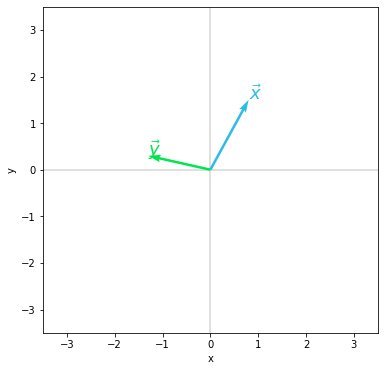

In [37]:
plot_vectors([x_hat, y_hat], texts_locs=[x_hat, y_hat])

Let's have them in a matrix form. Note this matrix transforms values from output basis (B2) to input bases (standard bases)!

In [38]:
B_2=np.stack((x_hat, y_hat)).T #have to transpose so that 1st col would correspond to x and second col to y values
B_2

array([[ 0.8, -1.3],
       [ 1.5,  0.3]])

Now we have a vector for which we want to change the basis from standard basis to B2

In [6]:
v_B1 = np.array([2, 1])

to transform this vector from input (standard) basis to output basis (B2) we need to use inverse

In [39]:
v_B2 = np.linalg.inv(B_2) @ v_B1
v_B2

array([ 0.86757991, -1.00456621])

to get back to standard basis we could use B_2 and shoukd get back original vector

In [40]:
B_2 @v_B2 #same vector

array([2., 1.])

## Transformation matrix

We have transformation matrix A which is defined in the standard basis. 

In [41]:
A=np.array([[1,1],
          [1,1]])
A

array([[1, 1],
       [1, 1]])

Now we want to find  transformation in bases B2

In [10]:
D= np.linalg.inv(B_2) @ A @ B_2
D

array([[ 1.6803653 , -0.73059361],
       [-0.73515982,  0.3196347 ]])

lets check if it is poducing same result as A, but in different basis

In [42]:
W_B1= A@ v_B1
#this should be same as W_B1
W_B1_1 = B_2 @ D @ np.linalg.inv(B_2) @ v_B1
W_B1, W_B1_1

(array([3, 3]), array([3., 3.]))

Lets plot our vector v_B1 and how A transforms it 

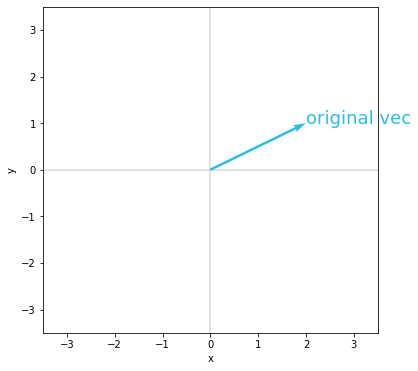

In [43]:
#original vector
ax=plot_vectors([v_B1], texts_locs=[v_B1], texts=['original vec'])

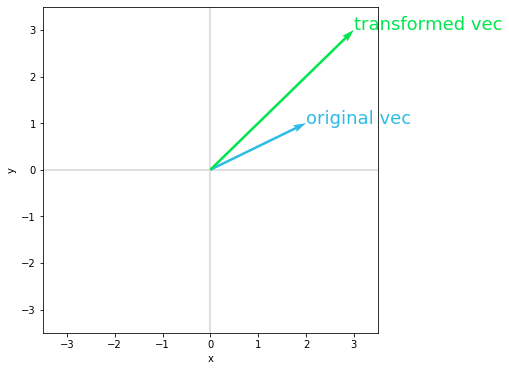

In [44]:
#transformed vector
ax=plot_vectors([v_B1, W_B1], texts_locs=[v_B1, W_B1], texts=['original vec', 'transformed vec'])

## Eigenvectors and values

#### Helpers

In [69]:
def plot_beer(x, y, x_label="Maximal temperature ($\degree$C)", y_label="Consuption (liters)", 
              alpha=0.3, draw_axes=False):
    plt.scatter(x, y, alpha=alpha)
    # [...] Add labels and custom axes

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Assure that ticks are displayed with a specific step
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
    
    if draw_axes:
        # draw axes
        plt.axhline(0, c='#d6d6d6', zorder=0)
        plt.axvline(0, c='#d6d6d6', zorder=0)

    # assure x and y axis have the same scale
    plt.axis('equal')
    plt.show()

#### Data

We have beer data from here: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

In [46]:
data_beer = pd.read_csv("data/beer_dataset.csv")
data_beer.shape

(365, 7)

In [48]:
data_beer.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


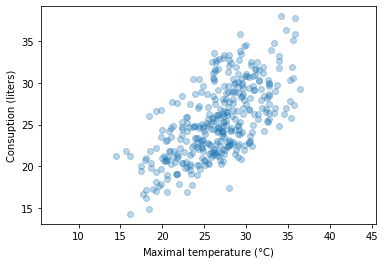

In [70]:
plot_beer(data_beer['Temperatura Maxima (C)'],
            data_beer['Consumo de cerveja (litros)'])

Keep only max temp and beer consumption columns

In [72]:
#make datasets 
X = np.array([data_beer['Temperatura Maxima (C)'],
            data_beer['Consumo de cerveja (litros)']]).T

#### Eigendecomposition of covariance matrix

First let's find covariance matrix

In [73]:
C = np.cov(X, rowvar=False)
C

array([[18.63964745, 12.20609082],
       [12.20609082, 19.35245652]])

In [74]:
#we can calculate covariance matrix using AtA matrix
X_norm = np.array([data_beer['Temperatura Maxima (C)'],
            data_beer['Consumo de cerveja (litros)']]).T
#in this case we have to zero center data beforehand
X_norm -= X_norm.mean(axis=0)
C_mat=np.transpose(X_norm)@X_norm
C_mat

array([[6784.83167123, 4443.01705808],
       [4443.01705808, 7044.29417481]])

Find eigenvalues and vectors

In [75]:
eigvals, eigvecs = np.linalg.eig(C)
eigvals, eigvecs

(array([ 6.78475896, 31.20734501]),
 array([[-0.71735154, -0.69671139],
        [ 0.69671139, -0.71735154]]))

Eigenvectors are same in our second covariance matrix, also order of eigenvalues is same

In [76]:
eigvals_mat, eigvecs_mat = np.linalg.eig(C_mat)
eigvals_mat, eigvecs_mat

(array([ 2469.65226294, 11359.4735831 ]),
 array([[-0.71735154, -0.69671139],
        [ 0.69671139, -0.71735154]]))

Turn eigenvectors into u and v matrix

In [77]:
u = eigvecs[:, 0].reshape(-1, 1)
v = eigvecs[:, 1].reshape(-1, 1)
u

array([[-0.71735154],
       [ 0.69671139]])

In [78]:
v

array([[-0.69671139],
       [-0.71735154]])

Plot eigenvectors

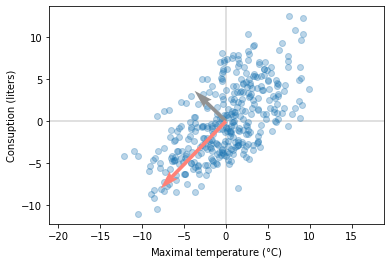

In [80]:
plt.quiver(0, 0,
           2 * np.sqrt(eigvals[0]) * u[0], 2 * np.sqrt(eigvals[0]) * u[1],
           color="#919191", angles='xy', scale_units='xy', scale=1,
           zorder=2, width=0.011)
plt.quiver(0, 0,
           2 * np.sqrt(eigvals[1]) * v[0], 2 * np.sqrt(eigvals[1]) * v[1],
           color="#FF8177", angles='xy', scale_units='xy', scale=1,
           zorder=2, width=0.011)

plot_beer(X_centered[:, 0], X_centered[:, 1], draw_axes=True)

Sort eigevecs based on eignevalues order

In [23]:
sort_index = eigvals.argsort()[::-1]   

eigvals_sorted = eigvals[sort_index]
eigvecs_sorted = eigvecs[:, sort_index]
eigvecs_sorted

array([[-0.69671139, -0.71735154],
       [-0.71735154,  0.69671139]])

Change the basis of data to eigenbasis

In [24]:
X_transformed = X_centered @ eigvecs_sorted

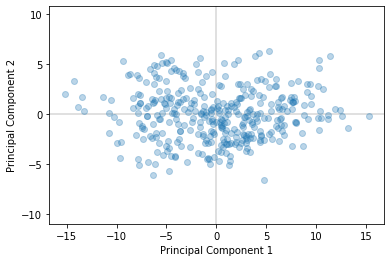

In [83]:
plot_beer(X_transformed[:, 0], X_transformed[:, 1],x_label="Principal Component 1",
          y_label="Principal Component 2", draw_axes=True)

We can also turn our transformed matrix back to original matrix

In [85]:
X_transformed_back =  X_transformed @ np.linalg.inv(eigvecs_sorted)

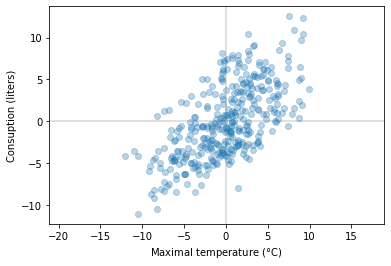

In [88]:
plot_beer(X_transformed_back[:, 0], X_transformed_back[:, 1], draw_axes=True)

In [94]:
#we could also reconstruct original covariance matrix from eigenvectors and values, eigvalues need to be diagonal!
eigvecs @ np.diag(eigvals) @ np.linalg.inv(eigvecs)

array([[18.63964745, 12.20609082],
       [12.20609082, 19.35245652]])

In [97]:
#eigenvectors are orthogonal, this coulde be check by taking dot product
eigvecs[0,:]@eigvecs[1, :]

0.0